# The Retrospective

---

## The brief

> **Client:** Rolling Beats Magazine (music publication)
>
> **Your role:** Data Journalist
>
> **Context:** Rolling Beats is preparing their "25 Years of Pop" retrospective issue. The editorial team wants data-driven stories that reveal how popular music has evolved since 2000. They're looking for surprising trends, cultural shifts, and compelling visualizations that tell the story of modern pop.
>
> You have access to 25 years of Billboard Hot 100 chart data (2000-2024), combined with Spotify's audio analysis of each track.
>
> **Your task:** Explore 25 years of chart data and uncover the stories hidden within. What trends emerge? What has changed, and what has stayed the same? Find insights that would make readers say "I never knew that."

---

## Understanding the data

This dataset spans an incredible period in music history:

- **2000**: The Napster era. CD sales at their peak.
- **2003-2010**: The iTunes revolution. Digital singles take over.
- **2010-2015**: YouTube becomes a music platform. Viral hits emerge.
- **2015-present**: Streaming dominance. Billboard changes its methodology to include streams.

### What the Billboard Hot 100 measures

The Hot 100 combines:
- **Radio airplay** (still matters!)
- **Streaming** (Spotify, Apple Music, YouTube, etc.)
- **Sales** (downloads, physical)

The formula has changed over time, which creates interesting dynamics – a streaming-era hit might look different from a radio-era hit.

## A note on data quality

- **Release dates vary**: Older songs have less precise dates (just year). Newer songs have full dates.
- **Catalog songs re-chart**: Old songs can re-enter the chart years later (TikTok effect, movie placements)
- **Christmas songs**: They return every year! December data is always unusual.
- **Methodology changes**: Billboard changed how it counts streams in 2013, 2018, and 2020.

**Tip for journalists:** Be careful about claiming trends – make sure the pattern isn't just an artifact of methodology changes!

---

## Suggested starting points

Think like a journalist. What stories would surprise readers?

- How has the **"sound" of popular music changed**? Track audio features across the decades.
- Has music gotten **more or less explicit** over time? More or less acoustic?
- Which artists **dominated each era**? Who had the longest chart presence?
- Are there **seasonal patterns** in the charts? (Christmas songs, summer anthems?)
- How long do **#1 hits** typically stay at the top? Has this changed?
- What's the average **"age" of a hit song**? Do old songs still chart? (Hint: compare release dates to chart dates)
- Have songs gotten **shorter or longer**? What about tempo – faster or slower?

**THESE ARE NOT QUESTIONS THAT I EXPECT YOU TO ANSWER, JUST IDEAS TO GET YOU STARTED.**

---

## Loading the data

In [1]:
from google.cloud.bigquery import Client
from google.auth import load_credentials_from_file

In [2]:
credentials, project = load_credentials_from_file("bigquery-access-key.json")

In [3]:
client = Client(
    project=project, credentials=credentials
)

In [4]:
!pip install db-dtypes
!pip install google-cloud-bigquery-storage

# List of all datasets
datasets = [
    "tracks", 
    "artists", 
    "audio_features", 
    "chart_positions", 
    "tracks_artists_mapping"
]

# Selecting one of them and constructing a query
# to the database
dataset = datasets[0]
    
query = f"""
SELECT *
FROM `hyper-python-2025.assessment.{dataset}`
"""

# Running the query and storing the results as a df
job = client.query(query)
df = job.to_dataframe()

## Your analysis

*Add cells below to explore the data and create visualizations. Structure it like a magazine feature – with clear narrative sections and compelling visuals that tell a story.*

# Exploring the data set

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Start exploring :)
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [8]:
df.isnull().sum()

track_id        0
name            0
duration_ms     0
release_date    0
album_type      0
explicit        0
dtype: int64

In [9]:
df.head(20)

,track_id,name,duration_ms,release_date,album_type,explicit
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False
1,4T7fVN4ZOFE3JoGyaxZL6O,Falls Apart,255160,1900-01-01,album,False
2,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
3,04vLj9QUXoKdRlsp3gkURo,Mele Kalikimaka (Merry Christmas),175333,1945-01-01,compilation,False
4,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False
5,1dtIaSlyrLI04sqYa8nLyN,Rudolph the Red-Nosed Reindeer,186733,1947,album,False
6,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,120693,1957-09,album,False
7,4HEOgBHRCExyYVeTyrXsnL,Jingle Bells - Remastered 1999,120693,1957-09,album,False
8,3QiAAp20rPC3dcAtKtMaqQ,Blue Christmas,129173,1957-10-15,album,False
9,7vQbuQcyTflfCIOu3Uzzya,Jingle Bell Rock,130973,1957-12-02,single,False


In [10]:
df.tail(10)

,track_id,name,duration_ms,release_date,album_type,explicit
11060,3xqD0CgWTjZ6RuvXaVyKEC,MADE MY HOE FAINT,115200,2024-09-20,album,True
11061,6XVkJ1fM7NkjODPYI7QbAM,HOLLON,128858,2024-09-20,single,True
11062,1Es7AUAhQvapIcoh3qMKDL,Timeless (with Playboi Carti),256000,2024-09-27,single,True
11063,1mg8rzws9v1V7OrHAIwT84,Fall Fast in Love,172602,2024-09-27,single,True
11064,3rXlcLZk3MCaRPND5g9QiW,Blow for Blow (feat. J. Cole),210285,2024-09-27,single,True
11065,5sRczgK1xkskY6HICpEKHa,"yes, and? - live version",199448,2024-10-01,album,True
11066,21SiVKUZKwWmL5C64G3R3e,don't wanna break up again,174006,2024-10-01,album,True
11067,4nQLt9m4p0fLUMOogvV6ZN,imperfect for you - live version,186201,2024-10-01,album,True
11068,4M7DbskLseolYL7rooP1SN,My Story,227813,2024-10-04,album,True
11069,2SMyu6hdDHWbLLXB76Oz4i,Apply Pressure,175609,2024-10-11,album,True


In [11]:
df["name"] = df["name"].str.lower()
df["name"].tail(10)

11060                   made my hoe faint
11061                              hollon
11062       timeless (with playboi carti)
11063                   fall fast in love
11064       blow for blow (feat. j. cole)
11065            yes, and? - live version
11066          don't wanna break up again
11067    imperfect for you - live version
11068                            my story
11069                      apply pressure
Name: name, dtype: object

In [12]:
df.describe()

,duration_ms
count,11070.0
mean,218972.503433
std,49259.141037
min,7500.0
25%,189269.5
50%,215722.0
75%,243773.0
max,1037906.0


In [13]:
df.columns

Index(['track_id', 'name', 'duration_ms', 'release_date', 'album_type',
       'explicit'],
      dtype='object')

In [14]:
df["name"].value_counts()

name
you                                                                   10
1, 2 step (feat. missy elliott)                                        9
home                                                                   8
without you                                                            7
crazy                                                                  6
                                                                      ..
do you want to build a snowman? - from "frozen"/soundtrack version     1
for the first time in forever - from "frozen"/soundtrack version       1
neon lights                                                            1
get me some of that                                                    1
apply pressure                                                         1
Name: count, Length: 10053, dtype: int64

In [15]:
df["explicit"].value_counts()

explicit
False    6850
True     4220
Name: count, dtype: Int64

In [16]:
df["album_type"].value_counts()

album_type
album          8977
single         1671
compilation     422
Name: count, dtype: int64

In [17]:
df.dropna()

,track_id,name,duration_ms,release_date,album_type,explicit
0,6zeDYmP3ARpURvpK29Q09P,someday,242800,1900-01-01,album,False
1,4T7fVN4ZOFE3JoGyaxZL6O,falls apart,255160,1900-01-01,album,False
2,5CMVGP24paZIukljDj0iWc,jingle bells (with the ken lane singers),156666,1945,compilation,False
3,04vLj9QUXoKdRlsp3gkURo,mele kalikimaka (merry christmas),175333,1945-01-01,compilation,False
4,25leEEaz1gIpp7o21Fqyjo,here comes santa claus (right down santa claus...,150266,1947,album,False
...,...,...,...,...,...,...
11065,5sRczgK1xkskY6HICpEKHa,"yes, and? - live version",199448,2024-10-01,album,True
11066,21SiVKUZKwWmL5C64G3R3e,don't wanna break up again,174006,2024-10-01,album,True
11067,4nQLt9m4p0fLUMOogvV6ZN,imperfect for you - live version,186201,2024-10-01,album,True
11068,4M7DbskLseolYL7rooP1SN,my story,227813,2024-10-04,album,True


# Extracting tables

In [18]:
chart_positions = client.query("SELECT * FROM `hyper-python-2025.assessment.chart_positions`").to_dataframe()
audio_features = client.query("SELECT * FROM `hyper-python-2025.assessment.audio_features`").to_dataframe()
tracks = client.query("SELECT * FROM `hyper-python-2025.assessment.tracks`").to_dataframe()
artists = client.query("SELECT * FROM `hyper-python-2025.assessment.artists`").to_dataframe()  
mapping = client.query("SELECT * FROM `hyper-python-2025.assessment.tracks_artists_mapping`").to_dataframe()

## Exploring tables

In [19]:
chart_positions.head()

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H


In [20]:
chart_positions.tail(10)

,chart_week,list_position,track_id
129295,2004-07-24,55,7zywdG4ysfC5XNBzjQAo2o
129296,2004-05-08,57,7zywdG4ysfC5XNBzjQAo2o
129297,2004-05-01,59,7zywdG4ysfC5XNBzjQAo2o
129298,2004-04-24,64,7zywdG4ysfC5XNBzjQAo2o
129299,2004-07-31,67,7zywdG4ysfC5XNBzjQAo2o
129300,2004-04-17,74,7zywdG4ysfC5XNBzjQAo2o
129301,2004-08-07,80,7zywdG4ysfC5XNBzjQAo2o
129302,2004-08-14,81,7zywdG4ysfC5XNBzjQAo2o
129303,2004-08-21,82,7zywdG4ysfC5XNBzjQAo2o
129304,2004-08-28,83,7zywdG4ysfC5XNBzjQAo2o


In [21]:
audio_features.head(50)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3lZpvPprN56RWqDqrKy9vl,0.0000,0.5320,3.0,-7.447,1.0,0.0000,0.976000,0.000000,0.0000,0.0000,0.000,0.0
8,0u1Sp4e3Phbbg9U215CMBe,0.0746,0.0420,2.0,-25.752,1.0,0.0408,0.925000,0.615000,0.0484,0.0347,77.810,4.0
9,4ecrWAB11dwNLB46lqeRHF,0.0772,0.0124,0.0,-33.833,1.0,0.0435,0.951000,0.749000,0.0748,0.0446,81.059,4.0


In [22]:
audio_features.tail(20)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
10763,5m0yZ33oOy0yYBtdTXuxQe,0.962,0.619,10.0,-5.562,0.0,0.4050,0.035400,0.000000,0.0830,0.154,127.956,4.0
10764,5NhqD8ODDHOOOXrqlctPUL,0.962,0.632,11.0,-4.700,0.0,0.1760,0.116000,0.000000,0.1080,0.892,119.917,4.0
10765,0fGh0trRN1xz3s41r7V5ce,0.963,0.643,1.0,-5.785,0.0,0.1170,0.050700,0.000049,0.1570,0.534,107.005,4.0
10766,6vN77lE9LK6HP2DewaN6HZ,0.963,0.346,5.0,-9.309,0.0,0.5300,0.035500,0.000000,0.1080,0.562,119.957,4.0
10767,3rKCDtV8UcF0RytSiXxypc,0.964,0.595,1.0,-6.887,0.0,0.1090,0.024800,0.000005,0.0405,0.629,128.593,4.0
10768,794F99D5BQHS5ZGRXAs7I5,0.964,0.605,9.0,-6.223,1.0,0.1790,0.066800,0.000008,0.2140,0.646,129.996,4.0
10769,577YBGuskWkVDCxZrLRB4v,0.964,0.487,10.0,-6.071,0.0,0.4210,0.001270,0.000006,0.1150,0.108,127.050,4.0
10770,11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11.0,-8.981,0.0,0.0795,0.001510,0.000039,0.1010,0.563,105.012,4.0
10771,2fZQIJew3nkNe99s2PKzul,0.965,0.414,1.0,-6.408,1.0,0.0712,0.189000,0.000000,0.0767,0.729,121.032,4.0
10772,1zLBsSVxETQOfINOLYvT5m,0.965,0.485,2.0,-8.784,1.0,0.1910,0.020600,0.023700,0.0655,0.312,124.025,4.0


In [23]:
tracks.head()

,track_id,name,duration_ms,release_date,album_type,explicit
0,6zeDYmP3ARpURvpK29Q09P,Someday,242800,1900-01-01,album,False
1,4T7fVN4ZOFE3JoGyaxZL6O,Falls Apart,255160,1900-01-01,album,False
2,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
3,04vLj9QUXoKdRlsp3gkURo,Mele Kalikimaka (Merry Christmas),175333,1945-01-01,compilation,False
4,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False


In [24]:
tracks.tail(10)

,track_id,name,duration_ms,release_date,album_type,explicit
11060,3xqD0CgWTjZ6RuvXaVyKEC,MADE MY HOE FAINT,115200,2024-09-20,album,True
11061,6XVkJ1fM7NkjODPYI7QbAM,HOLLON,128858,2024-09-20,single,True
11062,1Es7AUAhQvapIcoh3qMKDL,Timeless (with Playboi Carti),256000,2024-09-27,single,True
11063,1mg8rzws9v1V7OrHAIwT84,Fall Fast in Love,172602,2024-09-27,single,True
11064,3rXlcLZk3MCaRPND5g9QiW,Blow for Blow (feat. J. Cole),210285,2024-09-27,single,True
11065,5sRczgK1xkskY6HICpEKHa,"yes, and? - live version",199448,2024-10-01,album,True
11066,21SiVKUZKwWmL5C64G3R3e,don't wanna break up again,174006,2024-10-01,album,True
11067,4nQLt9m4p0fLUMOogvV6ZN,imperfect for you - live version,186201,2024-10-01,album,True
11068,4M7DbskLseolYL7rooP1SN,My Story,227813,2024-10-04,album,True
11069,2SMyu6hdDHWbLLXB76Oz4i,Apply Pressure,175609,2024-10-11,album,True


In [25]:
tracks["name"] = tracks["name"].str.lower()
tracks.tail(10)

,track_id,name,duration_ms,release_date,album_type,explicit
11060,3xqD0CgWTjZ6RuvXaVyKEC,made my hoe faint,115200,2024-09-20,album,True
11061,6XVkJ1fM7NkjODPYI7QbAM,hollon,128858,2024-09-20,single,True
11062,1Es7AUAhQvapIcoh3qMKDL,timeless (with playboi carti),256000,2024-09-27,single,True
11063,1mg8rzws9v1V7OrHAIwT84,fall fast in love,172602,2024-09-27,single,True
11064,3rXlcLZk3MCaRPND5g9QiW,blow for blow (feat. j. cole),210285,2024-09-27,single,True
11065,5sRczgK1xkskY6HICpEKHa,"yes, and? - live version",199448,2024-10-01,album,True
11066,21SiVKUZKwWmL5C64G3R3e,don't wanna break up again,174006,2024-10-01,album,True
11067,4nQLt9m4p0fLUMOogvV6ZN,imperfect for you - live version,186201,2024-10-01,album,True
11068,4M7DbskLseolYL7rooP1SN,my story,227813,2024-10-04,album,True
11069,2SMyu6hdDHWbLLXB76Oz4i,apply pressure,175609,2024-10-11,album,True


In [26]:
artists.head()

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450


In [27]:
artists.tail(10)

,artist_id,name,popularity,followers
3098,7dGJo4pcD2V6oG8kP0tJRR,Eminem,93,91487128
3099,12GqGscKJx3aE4t07u7eVZ,Peso Pluma,93,16616208
3100,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,94,60197201
3101,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,94,33611357
3102,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,86231149
3103,74KM79TiuVKeVCqs8QtB0B,Sabrina Carpenter,95,13599895
3104,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,96,92598894
3105,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,96,100687015
3106,3TVXtAsR1Inumwj472S9r4,Drake,96,92537455
3107,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,123544806


In [28]:
artists["popularity"].tail(20)

3088     92
3089     92
3090     92
3091     92
3092     92
3093     92
3094     92
3095     92
3096     93
3097     93
3098     93
3099     93
3100     94
3101     94
3102     95
3103     95
3104     96
3105     96
3106     96
3107    100
Name: popularity, dtype: Int64

In [29]:
mapping.head()

,track_id,artist_id
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
3,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY


In [30]:
# The column's name were inverted so I am going to rename them
mapping = mapping.rename(columns={
    'track_id': 'artist_id', 
    'artist_id': 'track_id'
})

In [31]:
type(mapping)

pandas.core.frame.DataFrame

In [32]:
mapping.head()

,artist_id,track_id
0,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
1,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
2,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
3,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
4,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY


In [33]:
mapping.tail()

,artist_id,track_id
15043,7zICaxnDB9ZprDSiFpvbbW,1mtUwv8L4nhMRfbP2pa36V
15044,7zICaxnDB9ZprDSiFpvbbW,0YHI5hydPPth6J5UOzdLDX
15045,7zICaxnDB9ZprDSiFpvbbW,5ztSiJBrCxd4Q0s0yc3tAV
15046,7zICaxnDB9ZprDSiFpvbbW,73oaAjfHAtUJDtul0QFlfs
15047,artist_id,track_id


# Joints

In [34]:
# Merging tables
df = pd.merge(tracks, mapping, left_on='track_id', right_on='track_id', how='inner')
df = pd.merge(df, artists, left_on='artist_id', right_on='artist_id', how='left', suffixes=('_track', '_artist'))
df = pd.merge(df, audio_features, left_on='track_id', right_on='track_id', how='inner')

In [35]:
df.head()

,track_id,name_track,duration_ms,release_date,album_type,explicit,artist_id,name_artist,popularity,followers,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6zeDYmP3ARpURvpK29Q09P,someday,242800,1900-01-01,album,False,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880,...,1.0,-4.390,0.0,0.0287,0.01050,0.08360,0.2100,0.939,110.855,4.0
1,4T7fVN4ZOFE3JoGyaxZL6O,falls apart,255160,1900-01-01,album,False,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880,...,4.0,-3.974,1.0,0.0306,0.00321,0.00623,0.2480,0.600,103.453,4.0
2,5CMVGP24paZIukljDj0iWc,jingle bells (with the ken lane singers),156666,1945,compilation,False,0TPlgv7eySSCChc2vKRIml,Ken Lane Singers,28,151,...,8.0,-14.405,1.0,0.0294,0.86800,0.00000,0.0774,0.634,137.569,4.0
3,5CMVGP24paZIukljDj0iWc,jingle bells (with the ken lane singers),156666,1945,compilation,False,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,79,7480976,...,8.0,-14.405,1.0,0.0294,0.86800,0.00000,0.0774,0.634,137.569,4.0
4,04vLj9QUXoKdRlsp3gkURo,mele kalikimaka (merry christmas),175333,1945-01-01,compilation,False,2NCGI6dLTxLdI9XHdv7QfM,The Andrews Sisters,55,205405,...,3.0,-12.431,1.0,0.0920,0.64600,0.00000,0.2840,0.619,202.677,4.0


In [36]:
df.tail()

,track_id,name_track,duration_ms,release_date,album_type,explicit,artist_id,name_artist,popularity,followers,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15479,5sRczgK1xkskY6HICpEKHa,"yes, and? - live version",199448,2024-10-01,album,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92,100365325,...,8.0,-5.852,1.0,0.0878,0.1050,0.0,0.0956,0.633,119.003,4.0
15480,21SiVKUZKwWmL5C64G3R3e,don't wanna break up again,174006,2024-10-01,album,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92,100365325,...,9.0,-5.207,0.0,0.0876,0.4210,0.0,0.1090,0.536,96.970,4.0
15481,4nQLt9m4p0fLUMOogvV6ZN,imperfect for you - live version,186201,2024-10-01,album,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92,100365325,...,4.0,-6.796,1.0,0.0331,0.6570,0.0,0.2830,0.261,150.146,3.0
15482,4M7DbskLseolYL7rooP1SN,my story,227813,2024-10-04,album,True,5lHRUCqkQZCIWeX7xG4sYT,Rich Homie Quan,71,2898743,...,4.0,-6.784,0.0,0.1060,0.0857,0.0,0.3190,0.315,159.350,3.0
15483,2SMyu6hdDHWbLLXB76Oz4i,apply pressure,175609,2024-10-11,album,True,45TgXXqMDdF8BkjA83OM7z,Rod Wave,80,7885342,...,8.0,-10.611,1.0,0.0407,0.0177,0.0,0.0947,0.540,81.999,4.0


In [37]:
print(tracks.columns)

Index(['track_id', 'name', 'duration_ms', 'release_date', 'album_type',
       'explicit'],
      dtype='object')


# Data cleaning

In [38]:
# Removing unnecessary values for the analysis 
junks = df[df['name_track'].str.contains("Karaoke|Tribute|Cover", case=False, na=False)].index
df_clean = df.drop(junks)

In [39]:
# Remove the TV show choir to see real artists
df_clean = df_clean[df_clean["name_artist"] != "Glee Cast"]

In [40]:
df_clean

,track_id,name_track,duration_ms,release_date,album_type,explicit,artist_id,name_artist,popularity,followers,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6zeDYmP3ARpURvpK29Q09P,someday,242800,1900-01-01,album,False,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880,...,1.0,-4.390,0.0,0.0287,0.01050,0.08360,0.2100,0.939,110.855,4.0
1,4T7fVN4ZOFE3JoGyaxZL6O,falls apart,255160,1900-01-01,album,False,4uN3DsfENc7dp0OLO0FEIb,Sugar Ray,63,988880,...,4.0,-3.974,1.0,0.0306,0.00321,0.00623,0.2480,0.600,103.453,4.0
2,5CMVGP24paZIukljDj0iWc,jingle bells (with the ken lane singers),156666,1945,compilation,False,0TPlgv7eySSCChc2vKRIml,Ken Lane Singers,28,151,...,8.0,-14.405,1.0,0.0294,0.86800,0.00000,0.0774,0.634,137.569,4.0
3,5CMVGP24paZIukljDj0iWc,jingle bells (with the ken lane singers),156666,1945,compilation,False,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,79,7480976,...,8.0,-14.405,1.0,0.0294,0.86800,0.00000,0.0774,0.634,137.569,4.0
4,04vLj9QUXoKdRlsp3gkURo,mele kalikimaka (merry christmas),175333,1945-01-01,compilation,False,2NCGI6dLTxLdI9XHdv7QfM,The Andrews Sisters,55,205405,...,3.0,-12.431,1.0,0.0920,0.64600,0.00000,0.2840,0.619,202.677,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,5sRczgK1xkskY6HICpEKHa,"yes, and? - live version",199448,2024-10-01,album,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92,100365325,...,8.0,-5.852,1.0,0.0878,0.10500,0.00000,0.0956,0.633,119.003,4.0
15480,21SiVKUZKwWmL5C64G3R3e,don't wanna break up again,174006,2024-10-01,album,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92,100365325,...,9.0,-5.207,0.0,0.0876,0.42100,0.00000,0.1090,0.536,96.970,4.0
15481,4nQLt9m4p0fLUMOogvV6ZN,imperfect for you - live version,186201,2024-10-01,album,True,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,92,100365325,...,4.0,-6.796,1.0,0.0331,0.65700,0.00000,0.2830,0.261,150.146,3.0
15482,4M7DbskLseolYL7rooP1SN,my story,227813,2024-10-04,album,True,5lHRUCqkQZCIWeX7xG4sYT,Rich Homie Quan,71,2898743,...,4.0,-6.784,0.0,0.1060,0.08570,0.00000,0.3190,0.315,159.350,3.0


# Analysis and Charts

## Top 10 artists

In [45]:
top_10_artists = df_clean.groupby("name_artist")["popularity"].agg(["mean", "count"])

top_10_artists[top_10_artists["count"] >= 5].sort_values("mean", ascending=False).head(10)
# Using >= 5 to avoid the "lucky" factor about singles that hit 100 on average score

,mean,count
name_artist,,
Taylor Swift,100.0,262
The Weeknd,96.0,97
Billie Eilish,96.0,44
Drake,96.0,334
Sabrina Carpenter,95.0,15
Bad Bunny,95.0,95
Bruno Mars,94.0,34
Travis Scott,94.0,121
Future,93.0,205


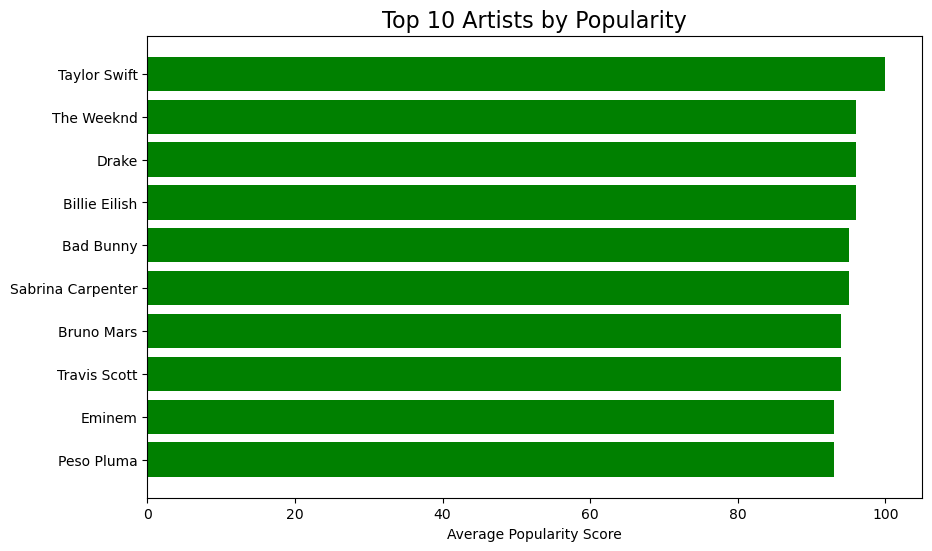

In [50]:
# Average of popularity
top_popular_artists = df_clean.groupby("name_artist")["popularity"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_popular_artists.index, top_popular_artists.values, color="#008000")
plt.gca().invert_yaxis() # Put #1 at the top
plt.title("Top 10 Artists by Popularity", fontsize=16)
plt.xlabel("Average Popularity Score")
plt.show()

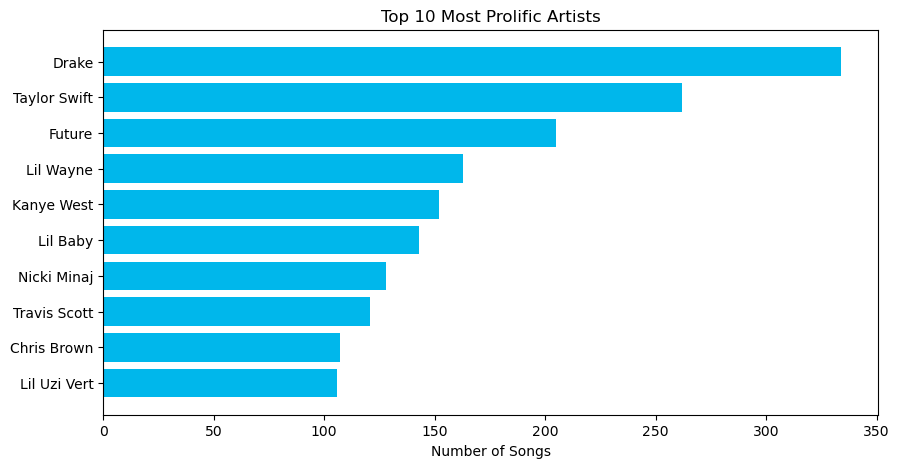

In [51]:
most_prolific = df_clean["name_artist"].value_counts().reset_index()

most_prolific.columns = ["Artist Name", "Song Count"]

# Getting the top 10
top_10_count = most_prolific.head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_10_count["Artist Name"], top_10_count["Song Count"], color="#00B7EB")
plt.xlabel('Number of Songs')
plt.title('Top 10 Most Prolific Artists')
plt.gca().invert_yaxis() # To put the number 1 artist on top
plt.show()

## Checking if the "explicit" factor affect popularity

In [52]:
avg_popularity = df_clean.groupby("explicit")["popularity"].mean()

print(avg_popularity)

explicit
False    69.836777
True     78.479817
Name: popularity, dtype: Float64


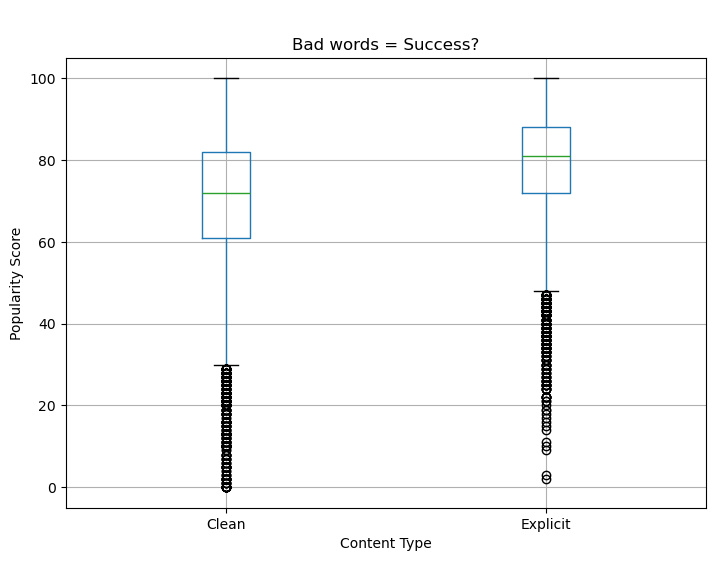

In [53]:
df_clean["content_type"] = df_clean["explicit"].map({True: 'Explicit', False: 'Clean'})
df_clean.boxplot(column="popularity", by="content_type", figsize=(8, 6))

plt.title("Bad words = Success?")
plt.suptitle(" ")  
plt.ylabel("Popularity Score")
plt.xlabel("Content Type")
plt.show()

## Are Songs Getting Shorter?

In [54]:
df_clean['year'] = df_clean['release_date'].astype(str).str[:4].astype(int)
avg_duration_by_year = df_clean.groupby('year')['duration_ms'].mean() / 60000

In [55]:
avg_duration_by_year.head(61)

year
1900    4.149667
1945    2.766658
1947    2.808325
1957    2.089717
1959    2.248271
          ...   
2020    3.255989
2021    3.435438
2022     3.30116
2023    3.400599
2024    3.324258
Name: duration_ms, Length: 61, dtype: Float64

In [56]:
avg_duration_by_year.tail(10)

year
2015    3.706067
2016    3.820921
2017    3.655073
2018    3.515325
2019    3.389855
2020    3.255989
2021    3.435438
2022     3.30116
2023    3.400599
2024    3.324258
Name: duration_ms, dtype: Float64

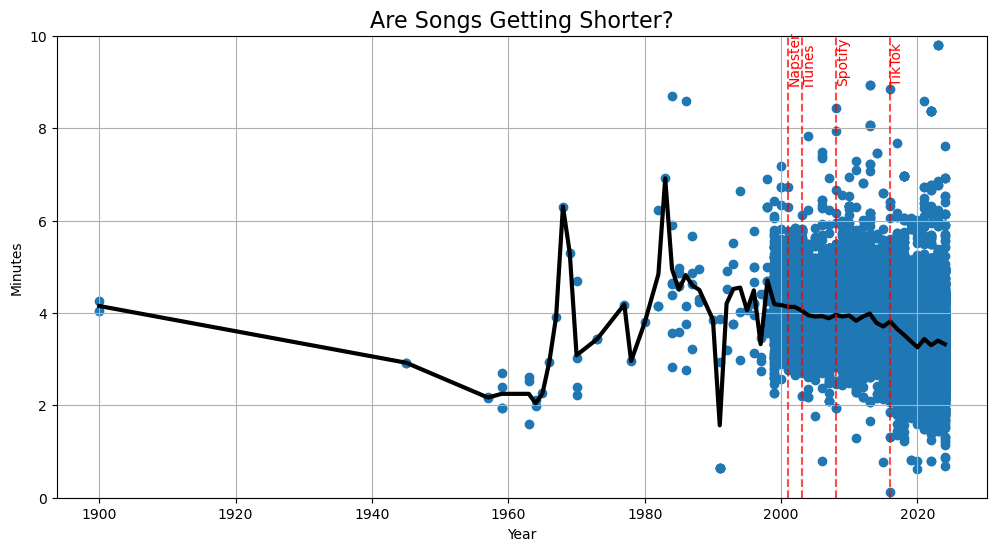

In [57]:
df_clean['year'] = pd.to_datetime(df_clean["release_date"], errors="coerce").dt.year
df_clean["minutes"] = df_clean["duration_ms"] / 60000  # Converting the duration in minutes
avg_trend = df_clean.groupby("year")["minutes"].mean()

plt.figure(figsize=(12, 6))
plt.scatter(df_clean["year"], df_clean["minutes"])
plt.plot(avg_trend.index, avg_trend.values, color="#000000", linewidth=3)

events = {
    2001: "Napster",
    2003: "iTunes",
    2008: "Spotify",
    2016: "TikTok"
}

# Creating a loop to get lines for every event
for year, label in events.items():
    plt.axvline(x=year, color="#FE0000", linestyle="--", alpha=0.7)
    plt.text(x=year, y=9, s=label, color="#FE0000", rotation=90)

plt.title("Are Songs Getting Shorter?", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Minutes")
plt.ylim(0, 10) 
plt.grid()
plt.show()

## Are songs getting happier or sadder?

In [58]:
print(df_clean.columns)

Index(['track_id', 'name_track', 'duration_ms', 'release_date', 'album_type',
       'explicit', 'artist_id', 'name_artist', 'popularity', 'followers',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'content_type', 'year', 'minutes'],
      dtype='object')


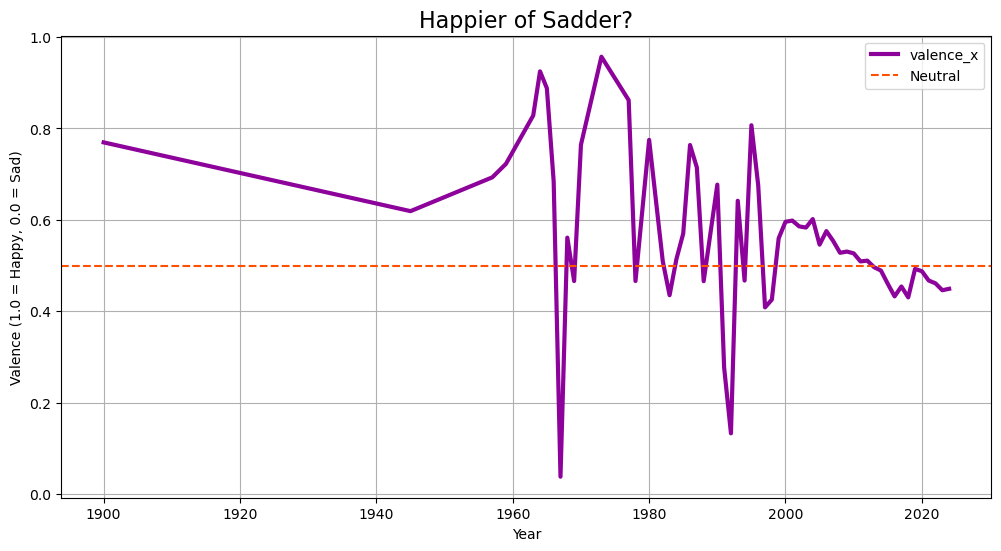

In [59]:
df_mood = pd.merge(
    df_clean, 
    audio_features, 
    left_on='track_id', 
    right_on='track_id', 
    how='inner'
)

sadness_trend = df_mood.groupby("year")["valence_x"].mean()


plt.figure(figsize=(12, 6))
sadness_trend.plot(color="#8D029B", linewidth=3)
plt.title("Happier of Sadder?", fontsize=16)
plt.ylabel("Valence (1.0 = Happy, 0.0 = Sad)")
plt.xlabel("Year")
plt.axhline(y=0.5, color="#FF4F00", linestyle="--", label="Neutral") 
plt.legend()
plt.grid()
plt.show()

## Are songs getting louder?

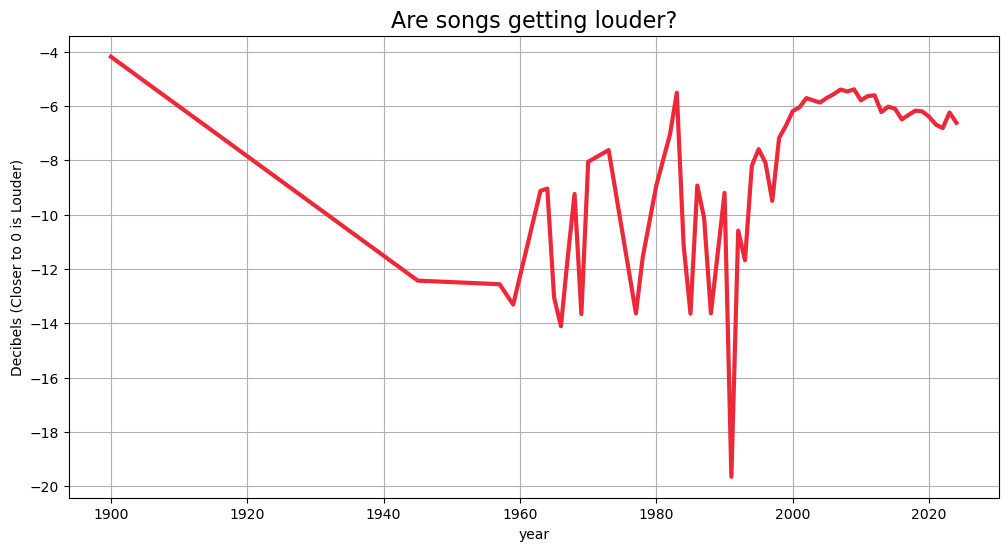

In [60]:
loudness_trend = df_clean.groupby("year")["loudness"].mean()

plt.figure(figsize=(12, 6))
loudness_trend.plot(color="#ED2839", linewidth=3)
plt.title("Are songs getting louder?", fontsize=16)
plt.ylabel("Decibels (Closer to 0 is Louder)")
plt.grid()
plt.show()

## Has Tempo Changed?

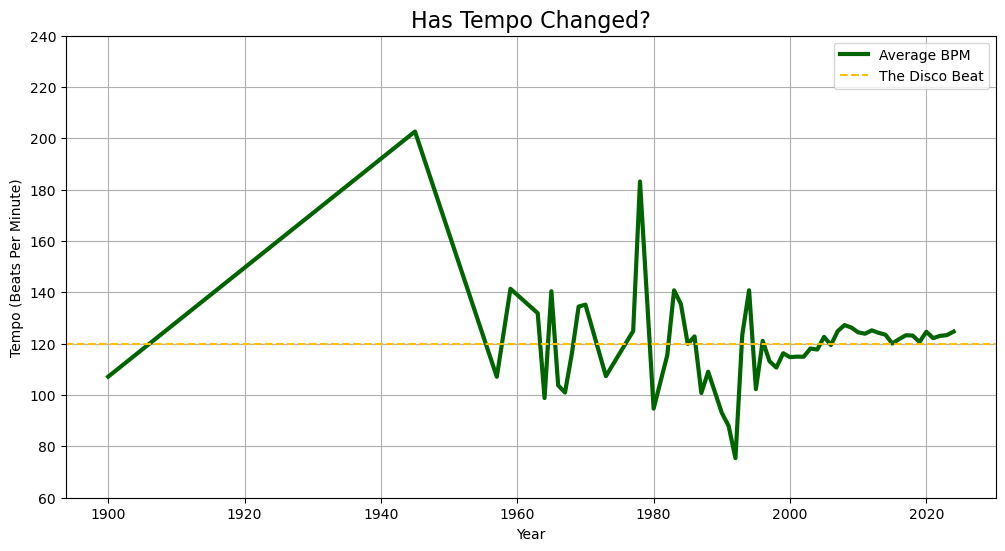

In [61]:
tempo_trend = df_mood.groupby('year')['tempo_x'].mean()

plt.figure(figsize=(12, 6))
plt.plot(tempo_trend.index, tempo_trend.values, color="#006400", linewidth=3, label="Average BPM")

plt.title("Has Tempo Changed?", fontsize=16)
plt.ylabel("Tempo (Beats Per Minute)")
plt.xlabel("Year")
plt.axhline(y=120, color="#FFBF00", linestyle="--", label="The Disco Beat")
plt.legend()
plt.grid()
plt.ylim(60, 240) 
plt.show()

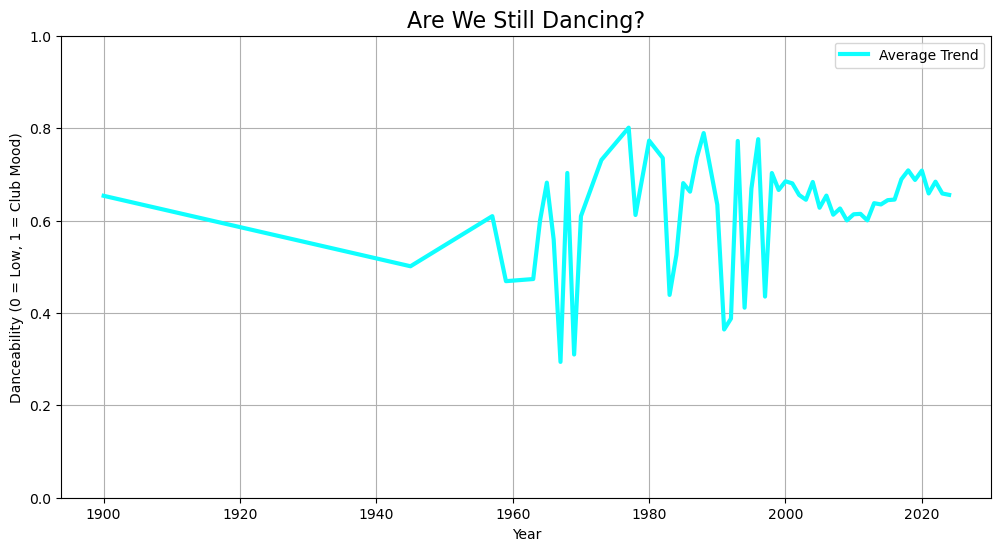

In [62]:
dance_trend = df_mood.groupby('year')["danceability_x"].mean()

plt.figure(figsize=(12, 6))
dance_trend.plot(color="#0FFFFF", linewidth=3, label='Average Trend')

plt.title("Are We Still Dancing?", fontsize=16)
plt.ylabel("Danceability (0 = Low, 1 = Club Mood)")
plt.xlabel("Year")
plt.ylim(0, 1) 
plt.grid()
plt.legend()
plt.show()

# My conclusions



How the Digital Age Reshaped the Pop Chart

As we switched from CDs to smartphones, the sound of the Billboard Hot 100 shifted, too. The data shows this wasn't just a trend, it was a necessity. To survive in the streaming era, music had to change to keep us listening.

1. The most obvious change is speed. In the era of CD sales, artists had time to build a mood. Today, the "Skip Button" is the scariest thing in the industry. To keep your finger off that button, songs have evolved to be leaner and faster. The long instrumental intro is dead; the hook now arrives in seconds in order to match with "reels" tempo. If you can't grab a listener before they scroll past on TikTok, you don't have a hit.

2. Hip-hop has decisively replaced Rock and R&B as the dominant sound of the century. Drake is the perfect case study for the streaming age: by releasing massive albums with over 25 songs, he floods the charts to get more streams. On the flip side, we have Taylor Swift. She is the industry's great outlier. An artist who still operates with an "old school" album mentality, yet dominates the streaming numbers anyway. She proves that while the medium changes, a loyal fanbase is still the ultimate currency.

3. Here is the most interesting contradiction in the data: Pop music has gotten sadder, but the beat hasn't slowed down. While lyrics and melodies have become darker and more introspective (a drop in "Valence"), the "Danceability" and "Tempo" have stayed pretty much the same. We aren't slowing down to cry; we're taking our anxiety to the dancefloor. The modern hit is a "Sad Banger": loud, rhythmic, and emotionally complex.

The Bottom Line is that Pop music in 2024 is optimized. It’s louder, shorter, and sadder than it was in 2000. But beneath the digital polish, the human element remains: we still want a beat we can move to.